k-means, k-means++ и PCA

k-means - Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. 
Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояни

PCA - один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Вычисление главных компонент сводится к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных или к сингулярному разложению матрицы данных.я.

Датасет для распределения пингвинов по их видам
https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data

Датасет включает: длину клюва, глубину клюва, длину крыльев/плавников, массу тела и пол

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

Обработка данных

In [2]:
data = pd.read_csv('./penguins.csv')

In [3]:
data

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                 NaN              NaN                NaN          NaN     NaN
4                36.7             19.3              193.0       3450.0  FEMALE
..                ...              ...                ...          ...     ...
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[344 rows x 5 columns]

In [4]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.nunique()

culmen_length_mm     163
culmen_depth_mm       80
flipper_length_mm     56
body_mass_g           93
sex                    3
dtype: int64

In [7]:
for col in data:
    print(col + ': ' + str(sorted(data[col].unique())))

culmen_length_mm: [32.1, 33.1, 33.5, 34.0, 34.4, 34.5, 34.6, 35.0, 35.1, 35.2, 35.3, 35.5, 35.6, 35.7, 35.9, 36.0, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.2, 37.3, 37.5, 37.6, 37.7, 37.8, 37.9, 38.1, 38.2, 38.3, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.5, 39.6, 39.7, 39.8, 40.1, 40.2, 40.3, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.8, 44.0, 44.1, 44.4, 44.5, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 48.1, 48.2, 48.4, 48.5, 48.6, 48.7, 48.8, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.3, 51.4, 51.5, 51.7, 51.9, 52.0, 52.1, 52.2, 52.5, 52.7, 52.8, 53.4, 53.5, 54.2, 54.3, 55.1, 55.8, 55.9, 58.0, 59.6]
cul

In [8]:
for col in data:
    print(col + ': ' + str(sorted(data[col].value_counts())))

culmen_length_mm: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 7]
culmen_depth_mm: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 12]
flipper_length_mm: [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 10, 10, 12, 13, 14, 14, 16, 17, 21]
body_mass_g: [1, 1, 1, 1, 1, 1, 

In [9]:
data = data[data.sex != '.']

In [10]:
for col in data:
    print(col + ': ' + str(sorted(data[col].unique())))

culmen_length_mm: [32.1, 33.1, 33.5, 34.0, 34.4, 34.5, 34.6, 35.0, 35.1, 35.2, 35.3, 35.5, 35.6, 35.7, 35.9, 36.0, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.2, 37.3, 37.5, 37.6, 37.7, 37.8, 37.9, 38.1, 38.2, 38.3, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.5, 39.6, 39.7, 39.8, 40.1, 40.2, 40.3, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.8, 44.0, 44.1, 44.4, 44.5, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 48.1, 48.2, 48.4, 48.5, 48.6, 48.7, 48.8, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.3, 51.4, 51.5, 51.7, 51.9, 52.0, 52.1, 52.2, 52.5, 52.7, 52.8, 53.4, 53.5, 54.2, 54.3, 55.1, 55.8, 55.9, 58.0, 59.6]
cul

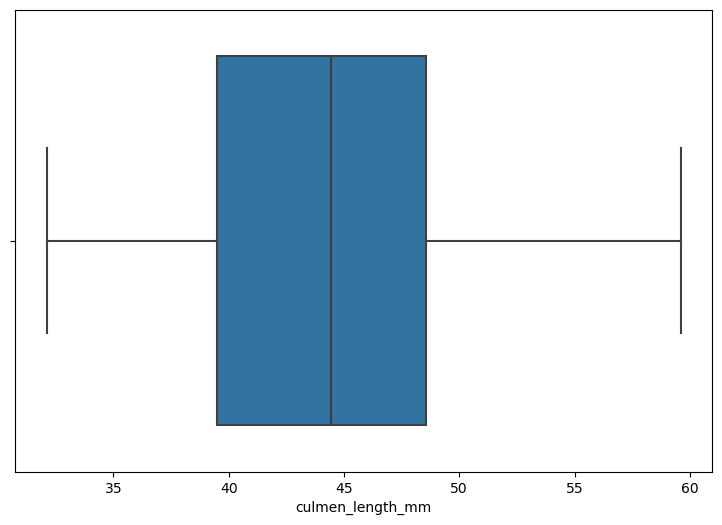

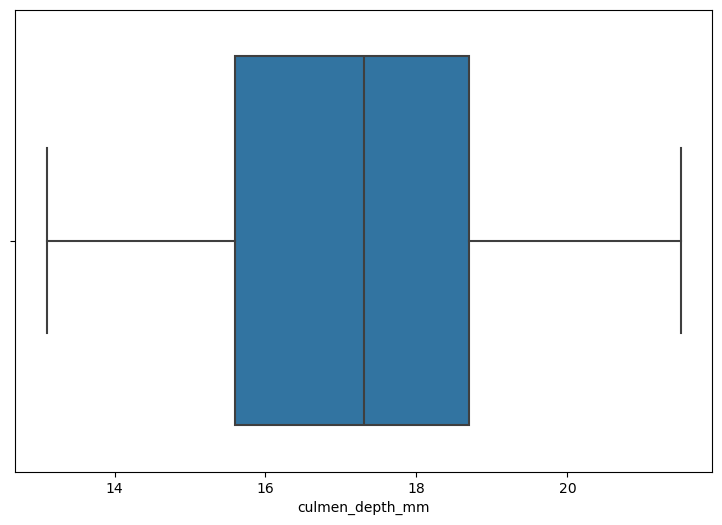

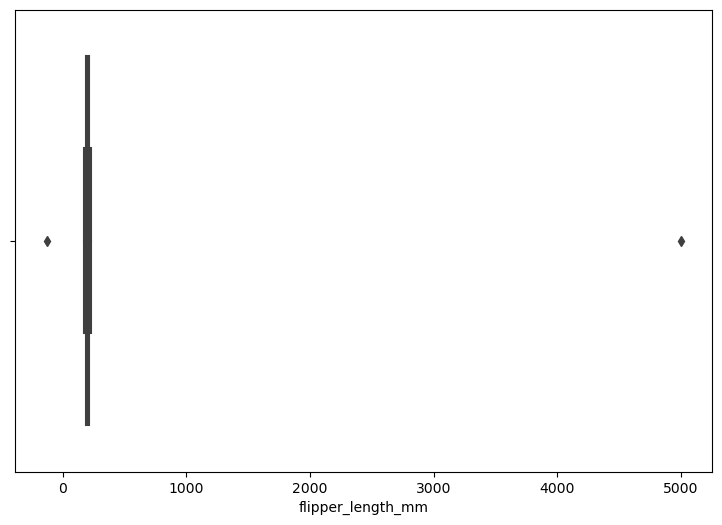

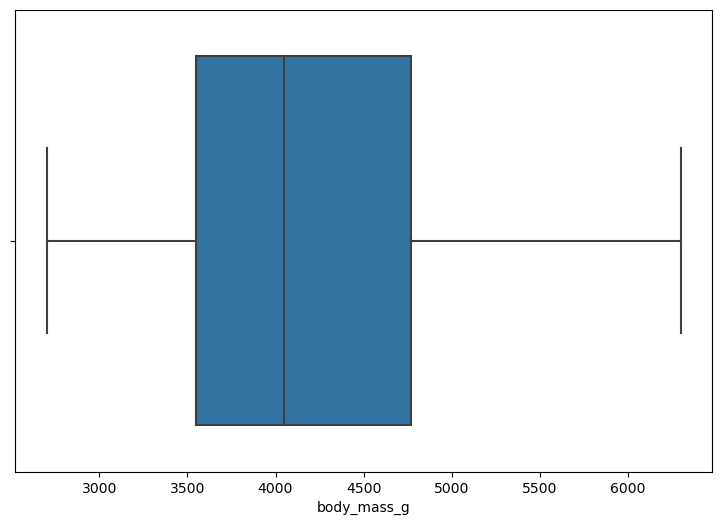

In [11]:
numerical_col = data.describe().columns.tolist()

for col in numerical_col:
  fig = plt.figure(figsize=(9,6))
  # ax = fig.gca()
  sns.boxplot(x=data[col])

In [12]:
le = LabelEncoder()
q_low = data['flipper_length_mm'].quantile(0.01)
q_hi  = data['flipper_length_mm'].quantile(0.99)
data = data[(data['flipper_length_mm'] < q_hi) & (data['flipper_length_mm'] > q_low)]
data.sex = le.fit_transform(data.sex).astype(int)
data

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0                39.1             18.7              181.0       3750.0    1
1                39.5             17.4              186.0       3800.0    0
2                40.3             18.0              195.0       3250.0    0
4                36.7             19.3              193.0       3450.0    0
5                39.3             20.6              190.0       3650.0    1
..                ...              ...                ...          ...  ...
338              47.2             13.7              214.0       4925.0    0
340              46.8             14.3              215.0       4850.0    0
341              50.4             15.7              222.0       5750.0    1
342              45.2             14.8              212.0       5200.0    0
343              49.9             16.1              213.0       5400.0    1

[321 rows x 5 columns]

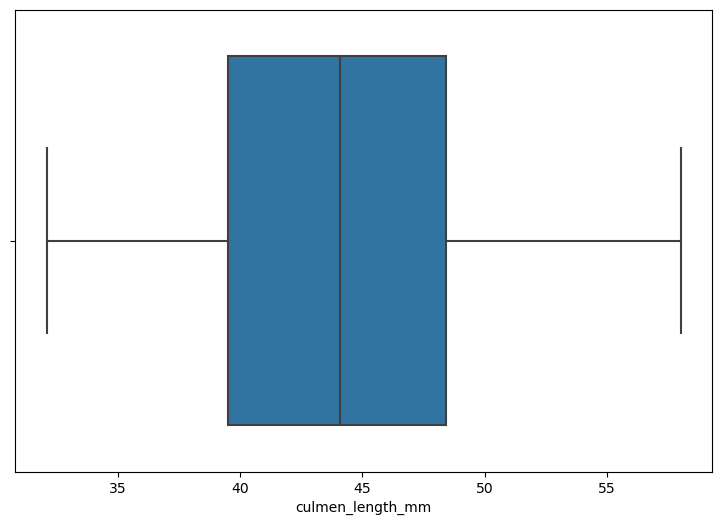

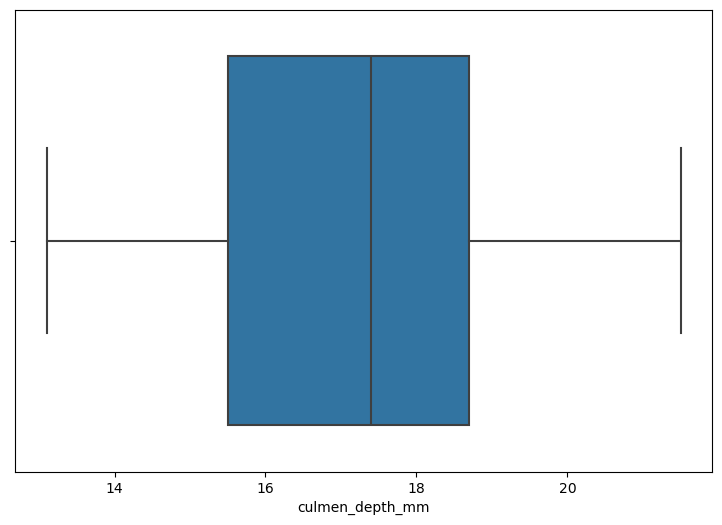

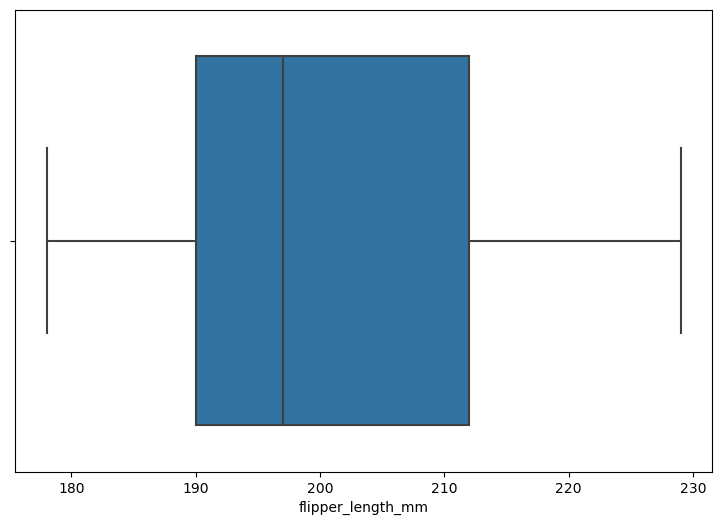

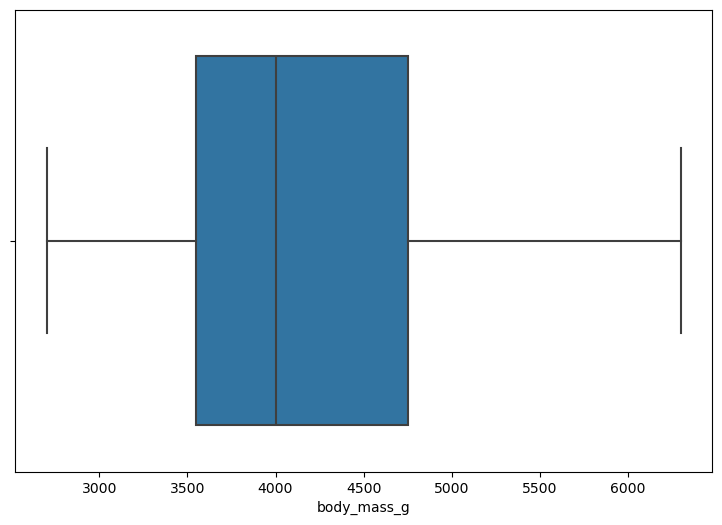

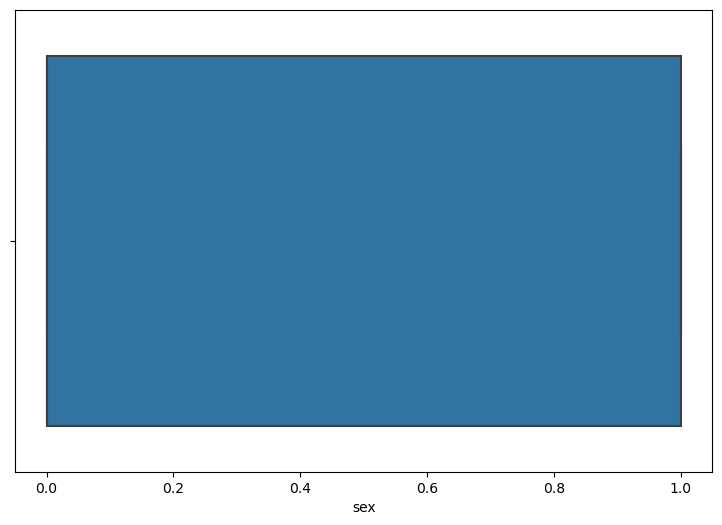

In [13]:
numerical_col = data.describe().columns.tolist()

for col in numerical_col:
  fig = plt.figure(figsize=(9,6))
  # ax = fig.gca()
  sns.boxplot(x=data[col])

<Axes: >

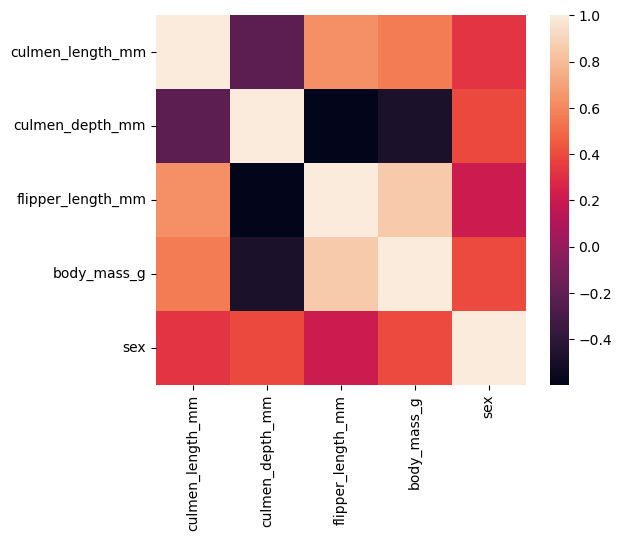

In [14]:
f, ax = plt.subplots()
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax)

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
new_data = pd.DataFrame(data=X, columns=data.columns)
new_data.head(10)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g       sex
0         -0.895481         0.774403          -1.474530    -0.549081  1.009390
1         -0.820183         0.118776          -1.096476    -0.484754 -0.990697
2         -0.669587         0.421373          -0.415978    -1.192347 -0.990697
3         -1.347268         1.077000          -0.567200    -0.935040 -0.990697
4         -0.857832         1.732627          -0.794032    -0.677734  1.009390
5         -0.933130         0.320508          -1.474530    -0.709897 -0.990697
6         -0.876656         1.228299          -0.415978     0.640962  1.009390
7         -0.518992         0.219642          -1.398919    -1.256673 -0.990697
8         -0.989603         2.035224          -0.718421    -0.484754  1.009390
9         -1.366092         0.320508          -1.172087    -0.613407 -0.990697

Обучение

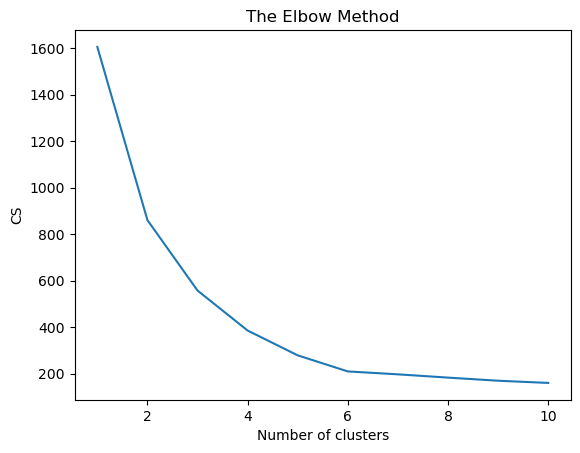

In [16]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

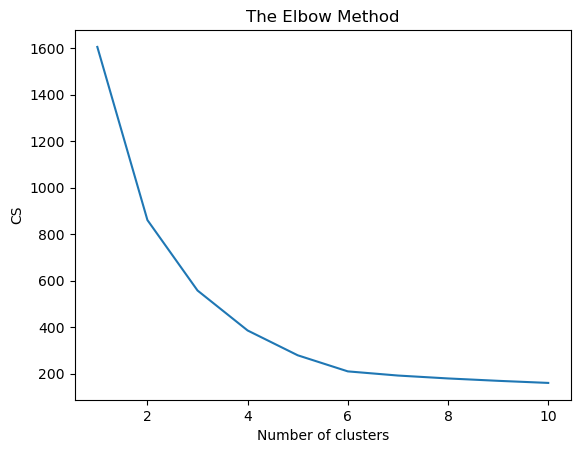

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

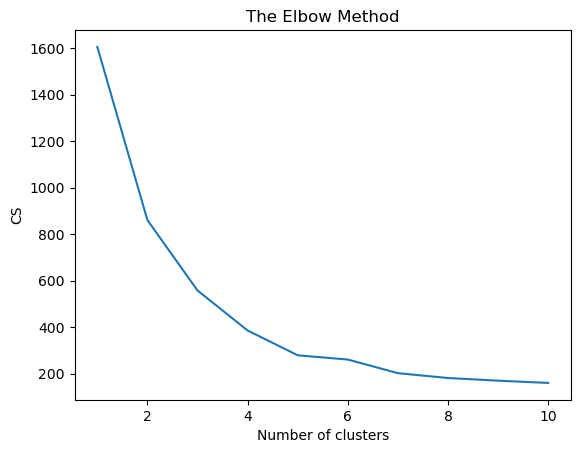

In [18]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

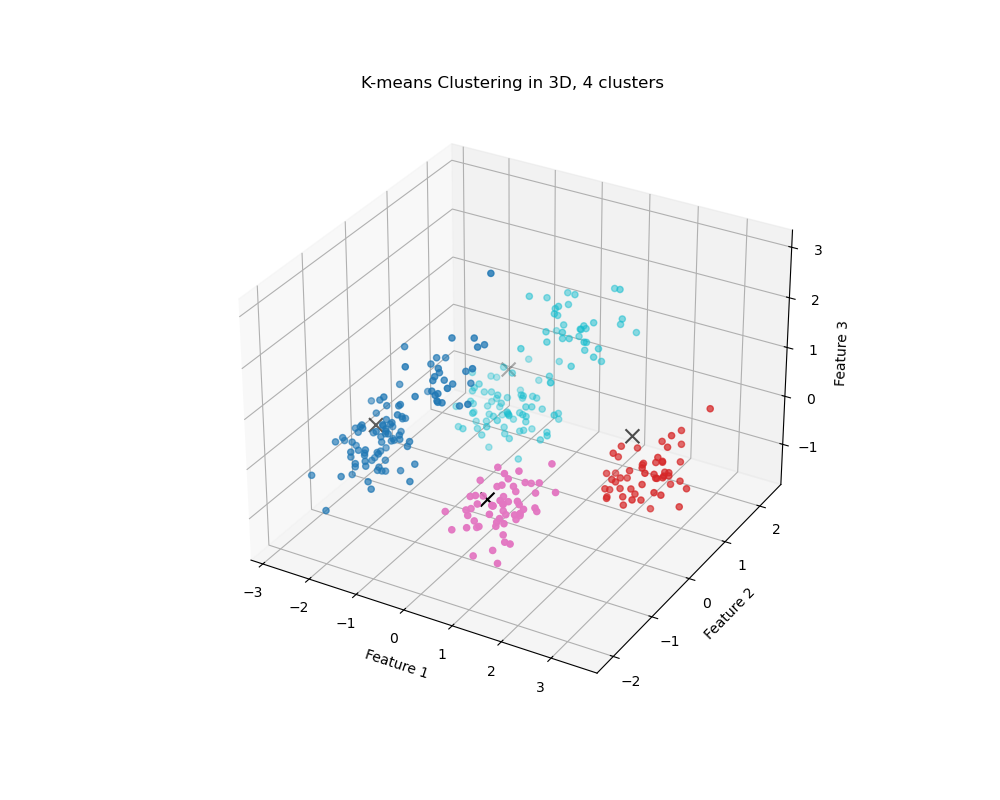

10


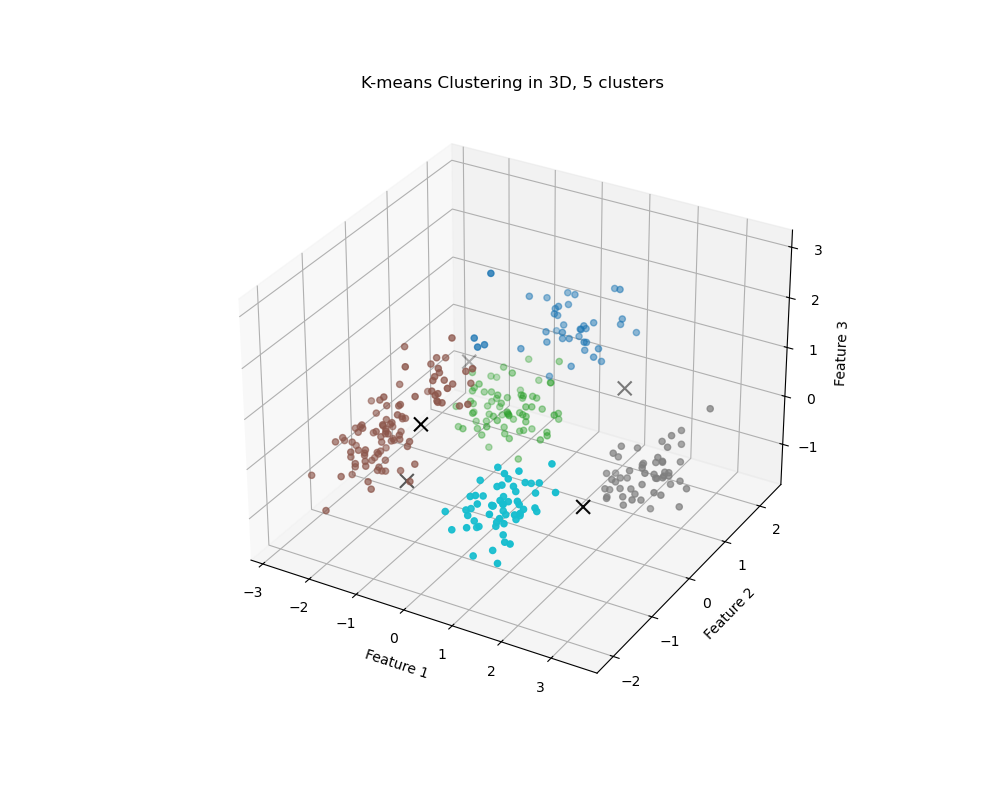

3


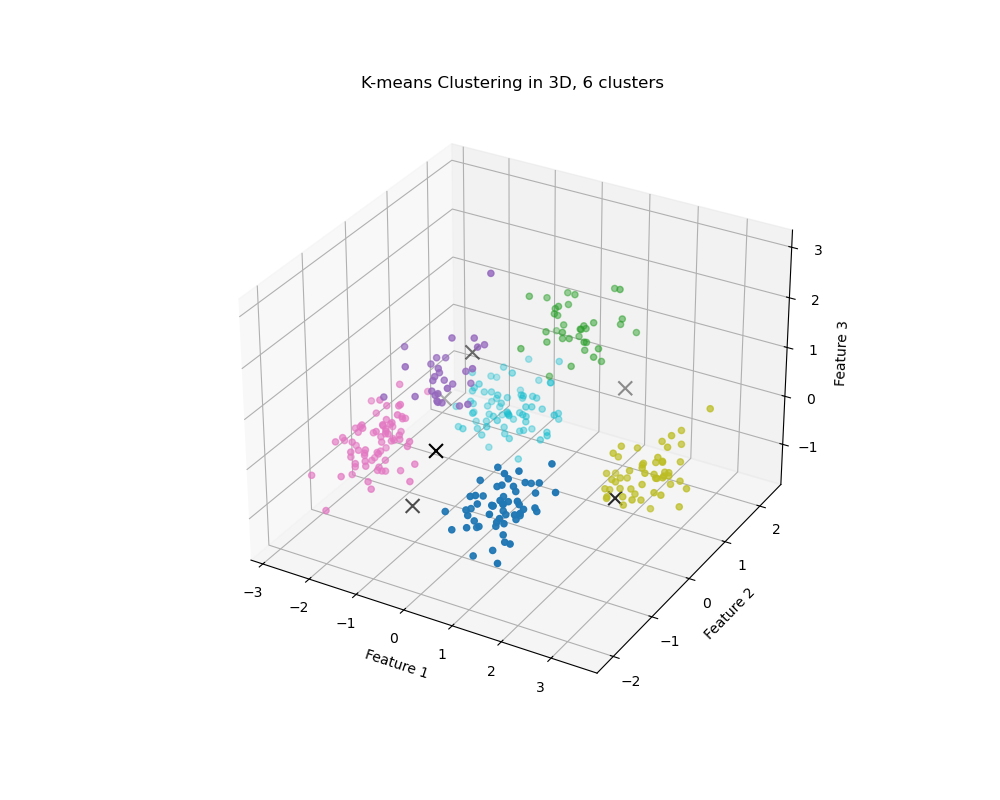

5


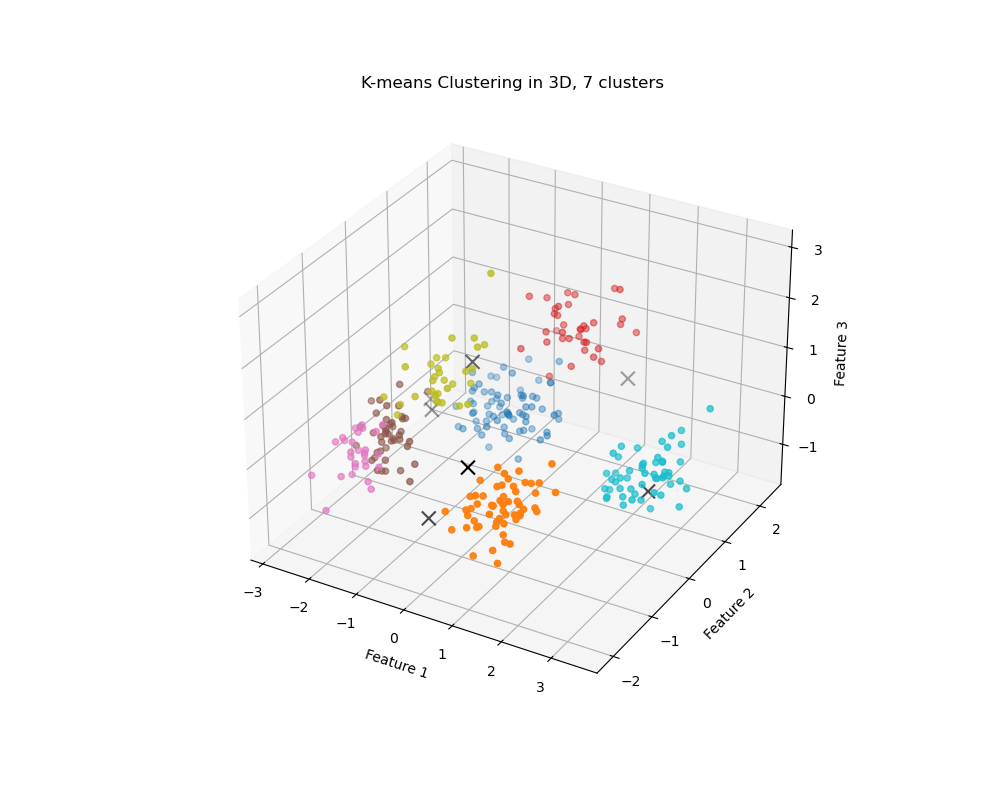

7


In [19]:
%matplotlib widget
for k in range(4, 8):
    kmeans = KMeans(n_clusters = k, init = 'random', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

    p=ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=100, c='black', marker = 'x')
    p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(f'K-means Clustering in 3D, {k} clusters')

    plt.show()
    print(kmeans.n_iter_)

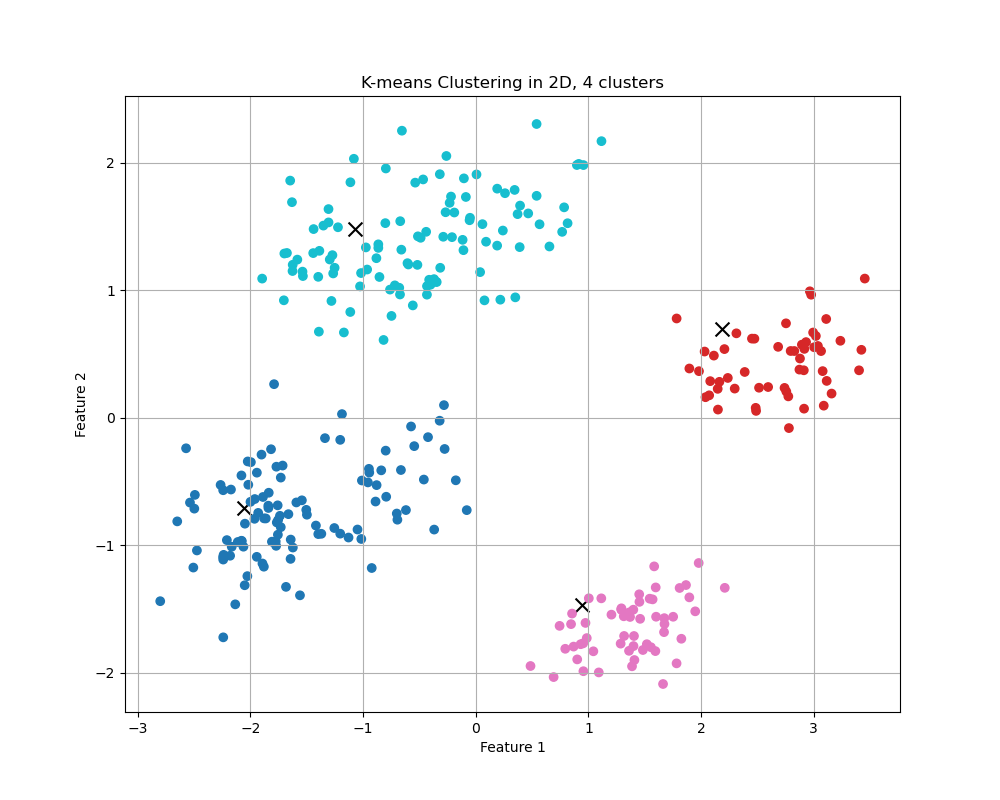

10


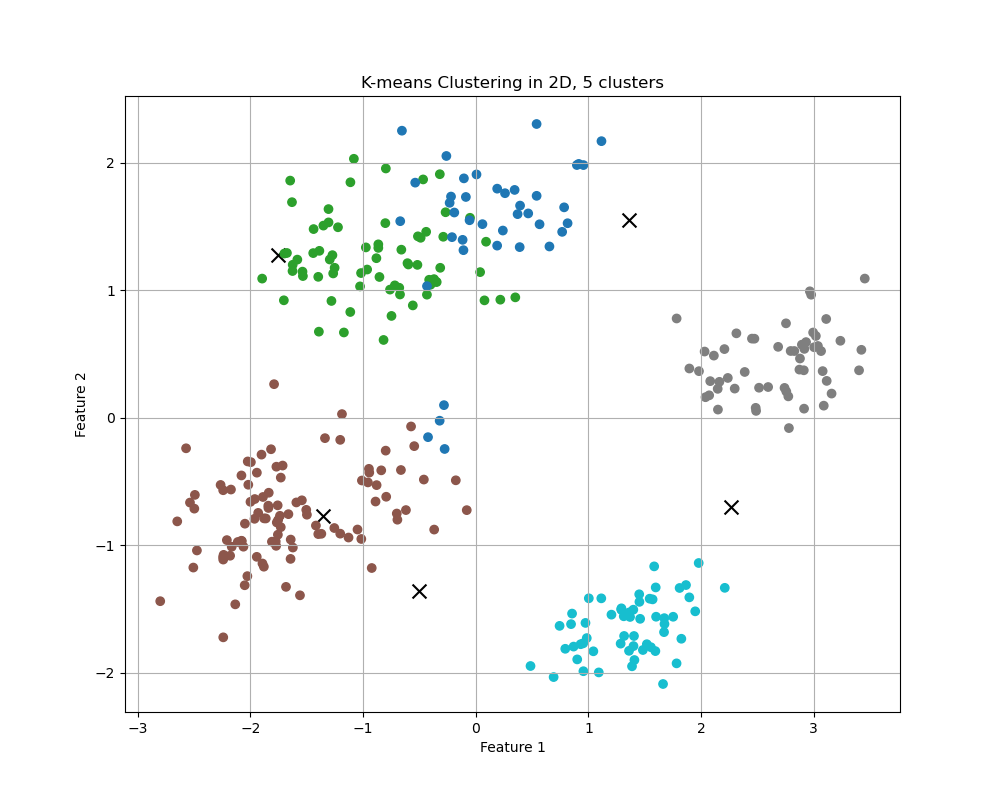

3


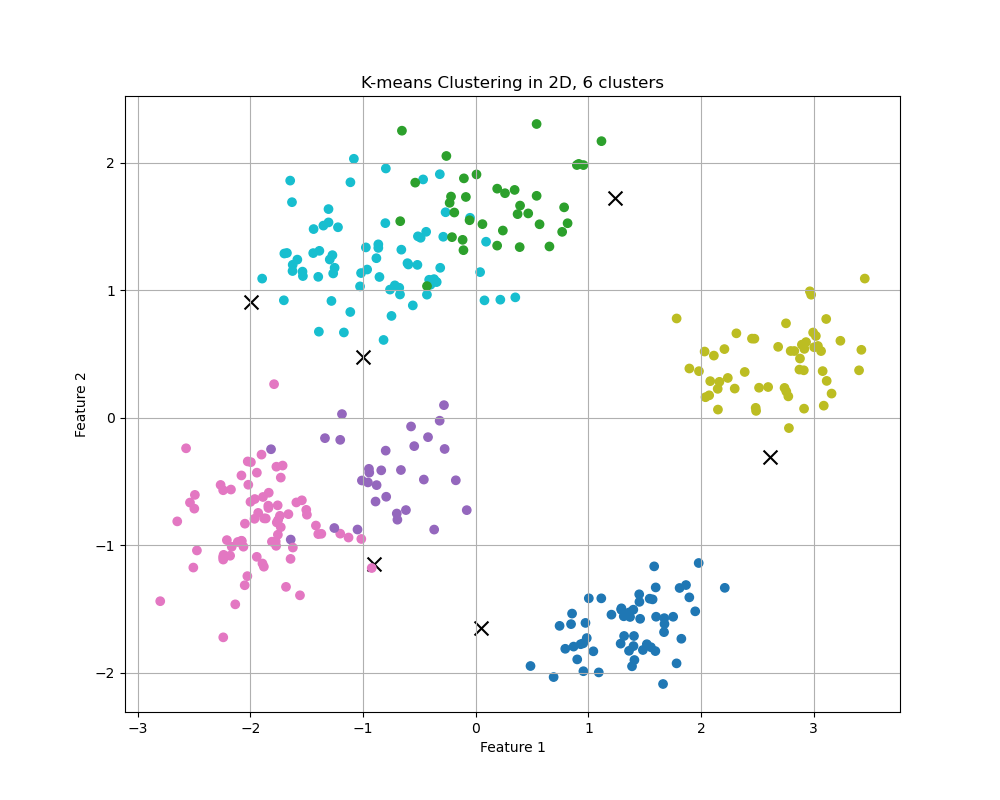

5


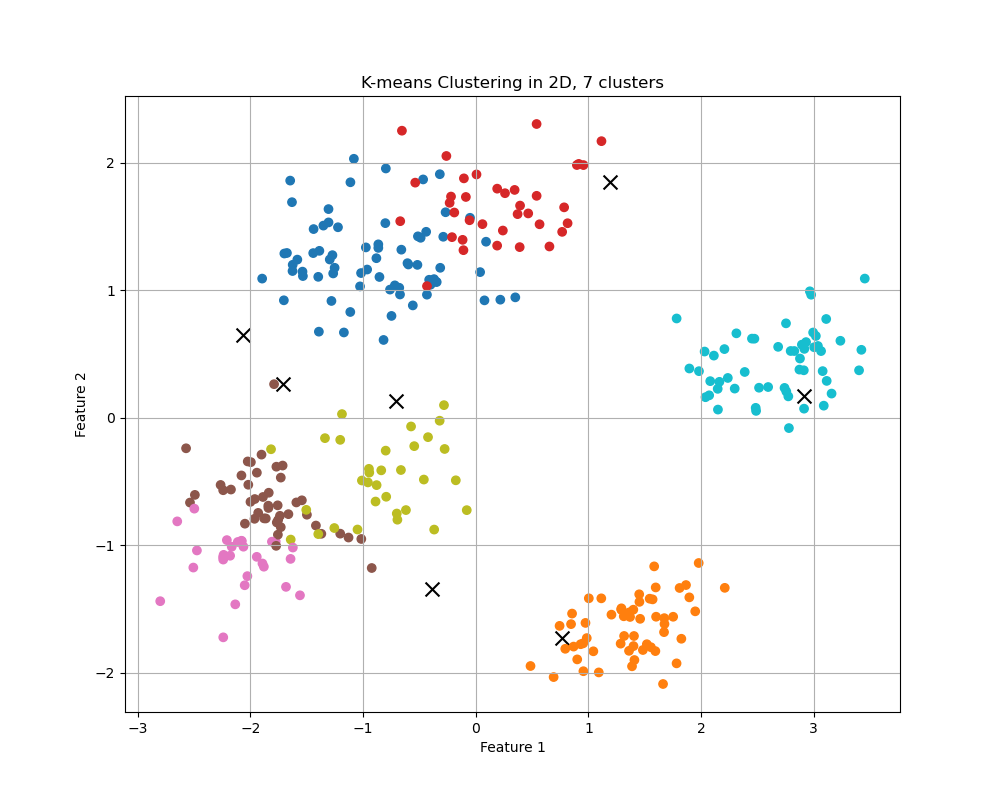

7


In [20]:
for k in range(4, 8):
    kmeans = KMeans(n_clusters = k, init = 'random', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker = 'x')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering in 2D, {k} clusters')
    plt.grid(True)
    plt.show()

    print(kmeans.n_iter_)

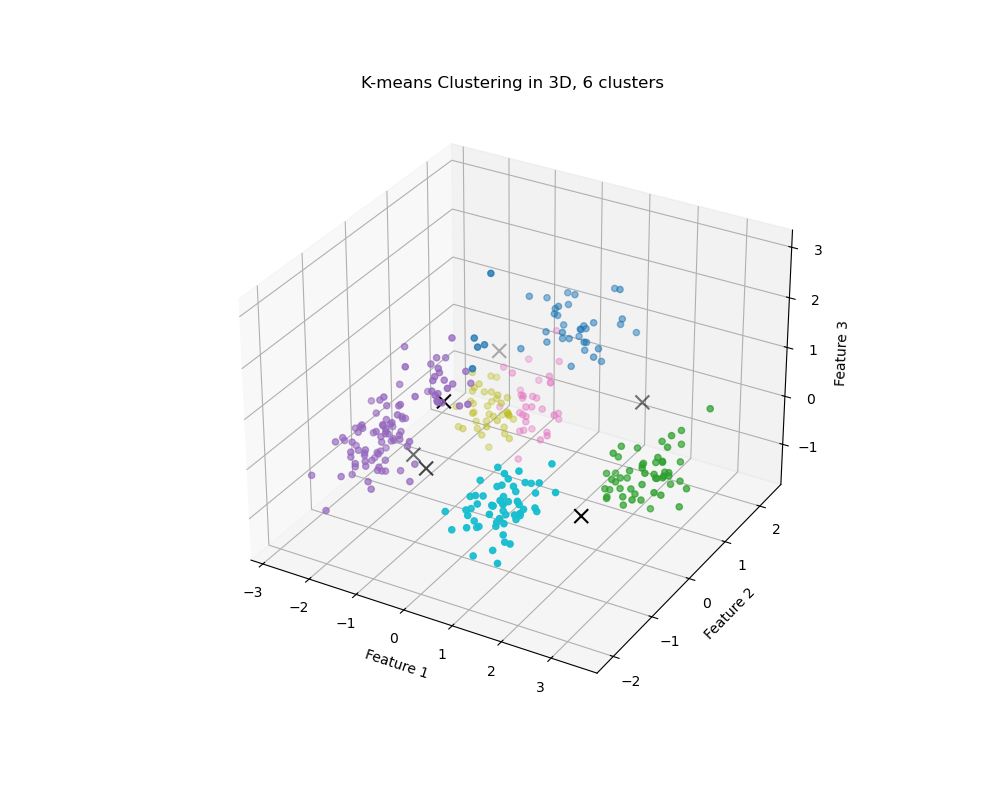

18


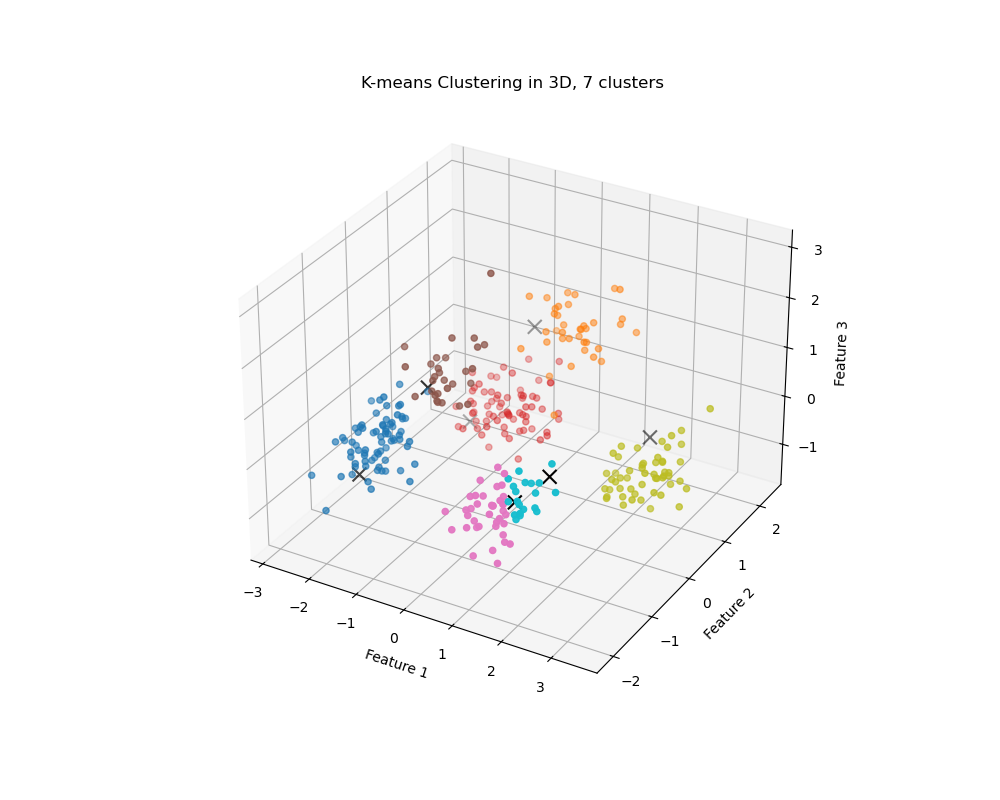

8


In [21]:
%matplotlib widget
for k in range(6, 8):
    kmeans = KMeans(n_clusters = k, init = 'random', random_state = 0)
    y_kmeans = kmeans.fit_predict(X)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

    p=ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=100, c='black', marker = 'x')
    p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(f'K-means Clustering in 3D, {k} clusters')

    plt.show()
    print(kmeans.n_iter_)

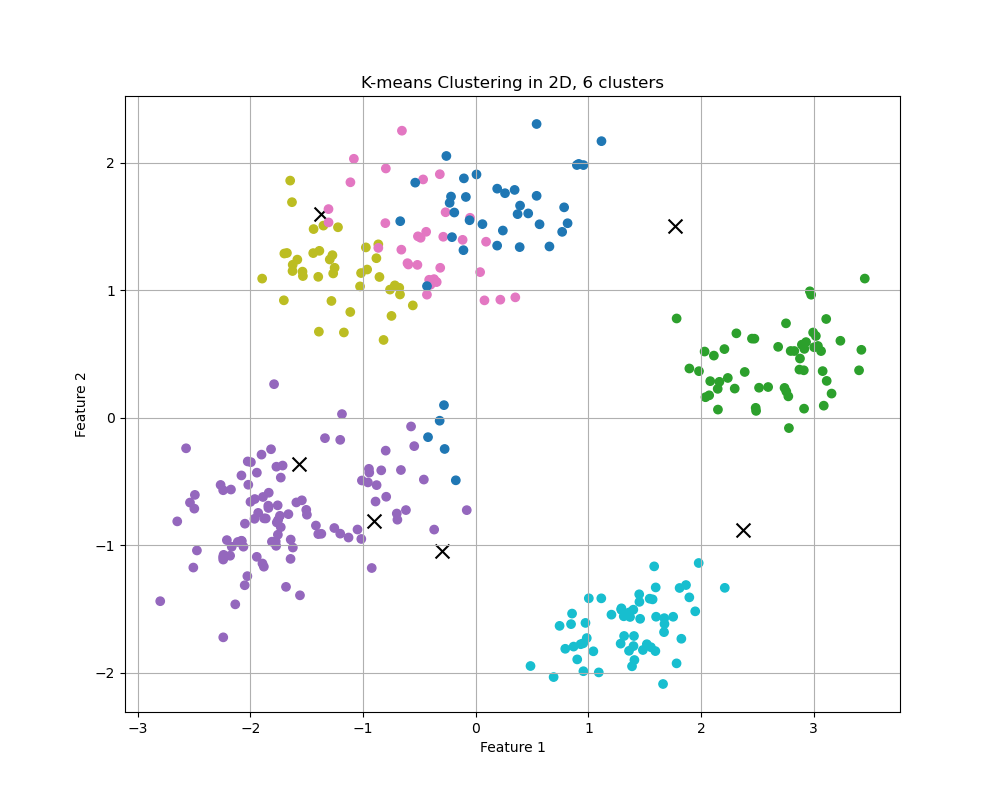

18


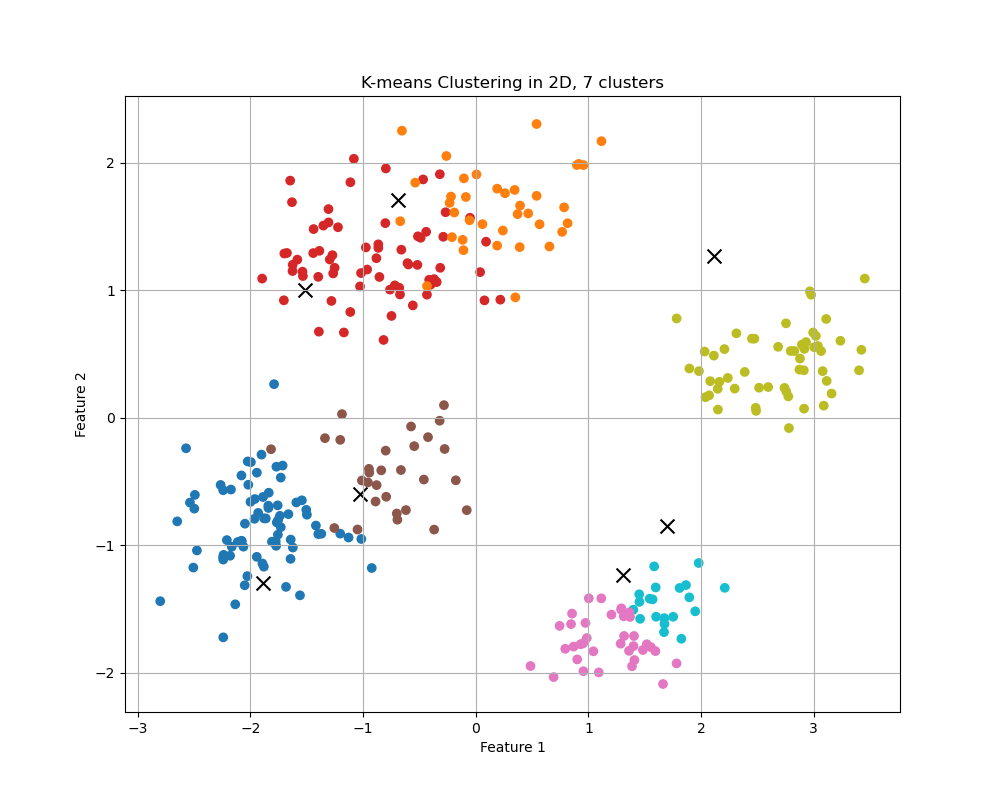

8


In [22]:
for k in range(6, 8):
    kmeans = KMeans(n_clusters = k, init = 'random', random_state = 0)
    y_kmeans = kmeans.fit_predict(X)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker = 'x')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering in 2D, {k} clusters')
    plt.grid(True)
    plt.show()

    print(kmeans.n_iter_)

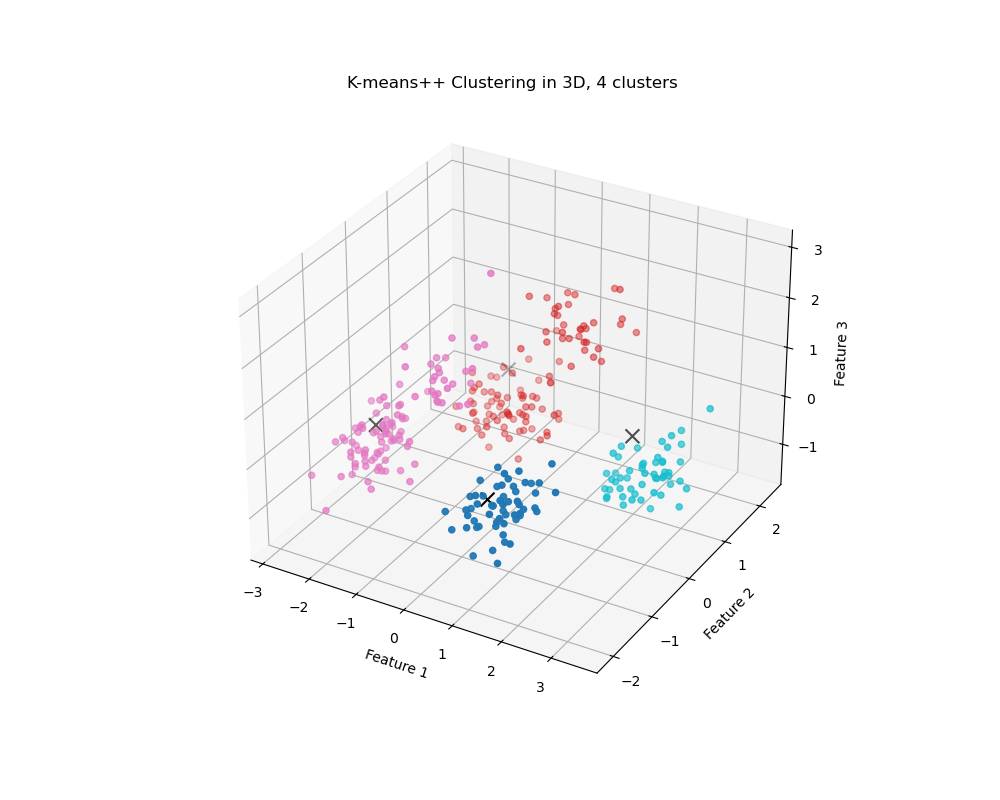

4


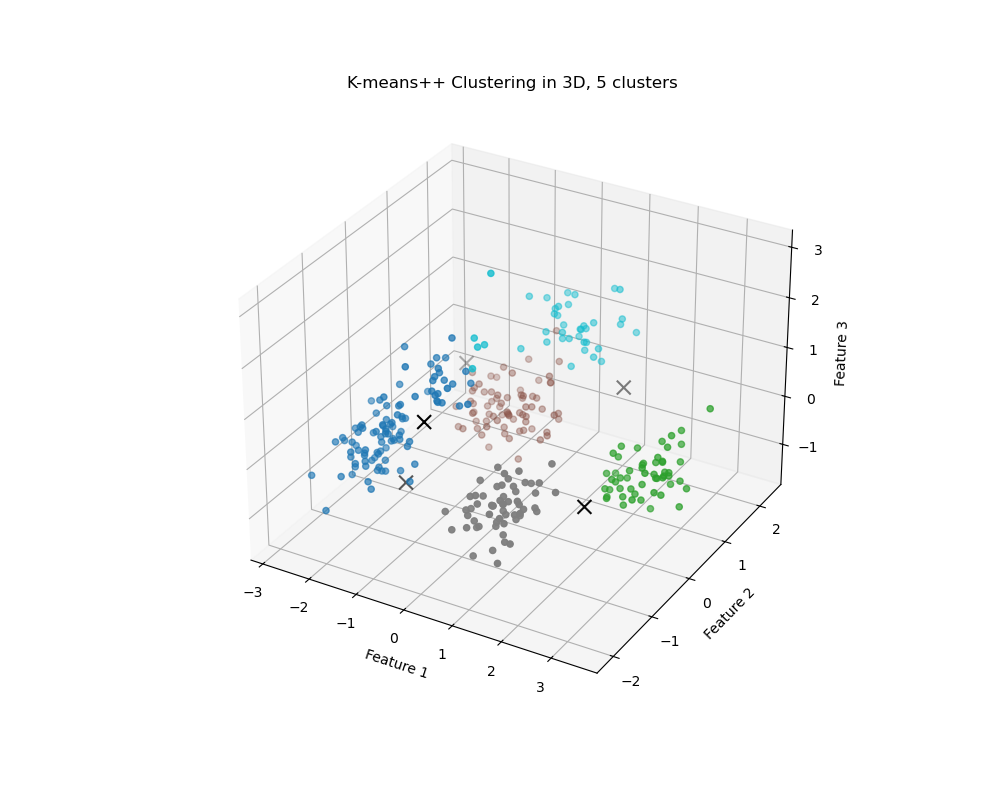

3


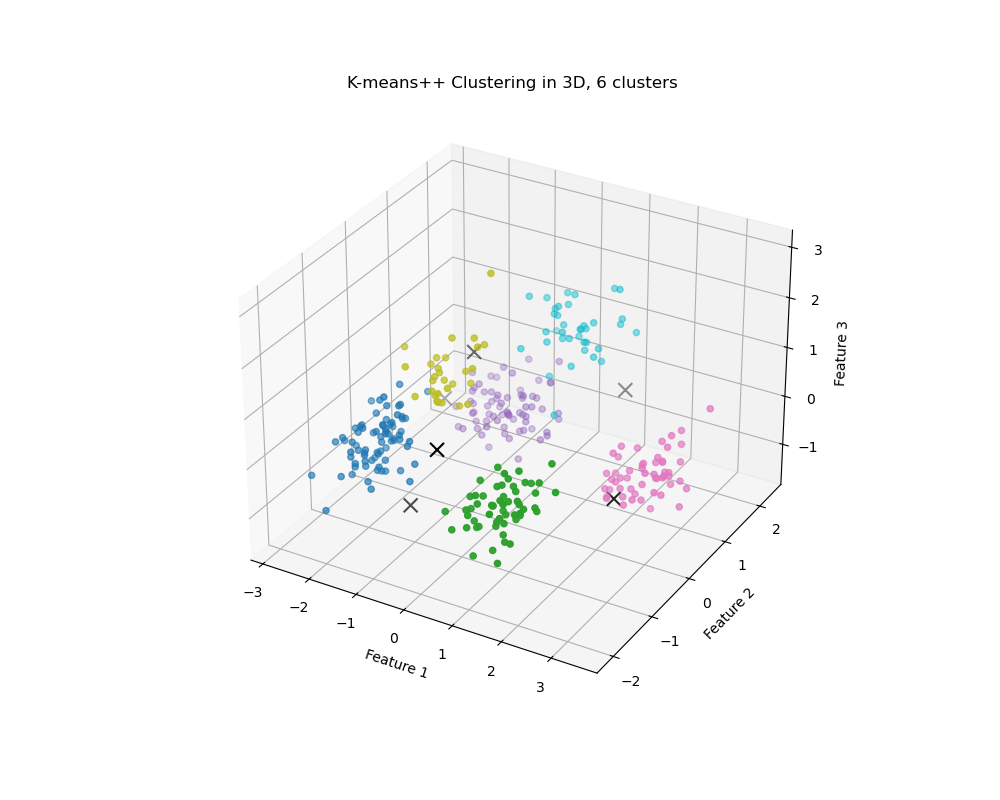

3


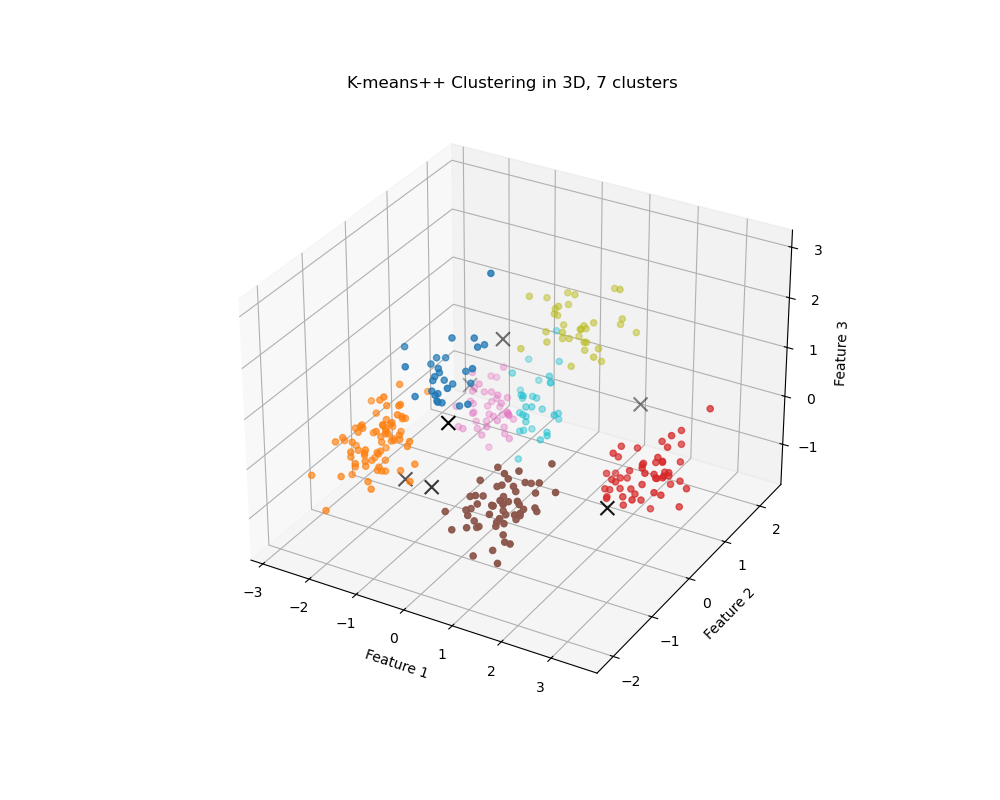

9


In [23]:
%matplotlib widget
for k in range(4, 8):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    y_kmeans = kmeans.fit_predict(X)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

    p=ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=100, c='black', marker = 'x')
    p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(f'K-means++ Clustering in 3D, {k} clusters')

    plt.show()
    print(kmeans.n_iter_)

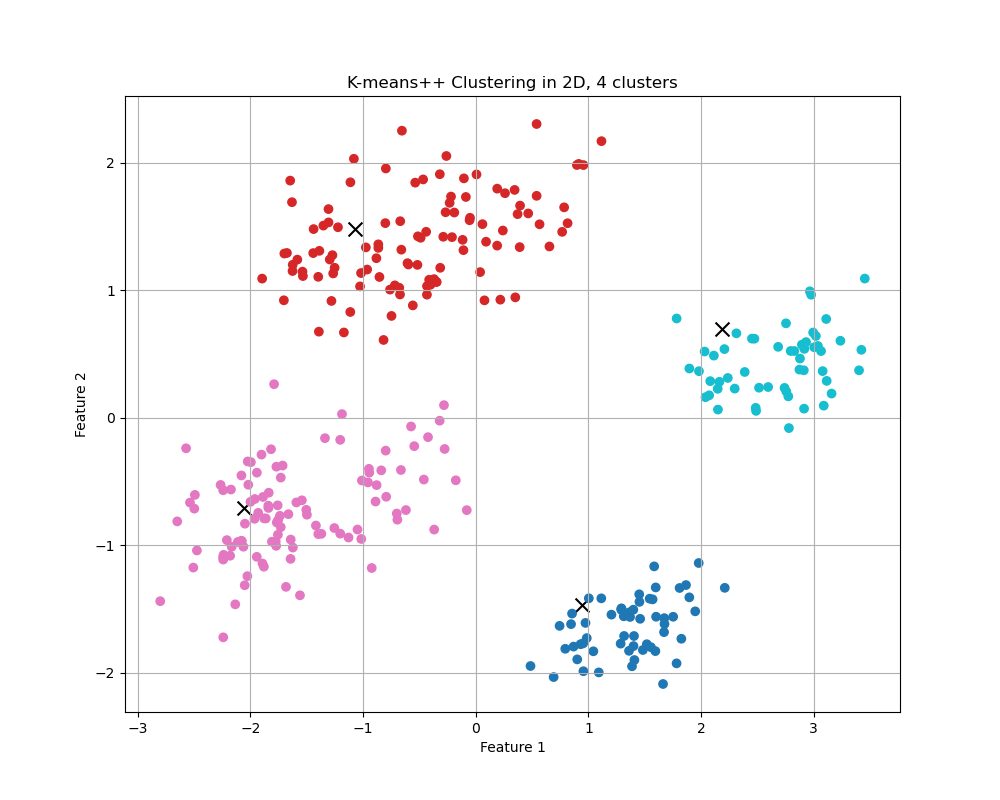

4


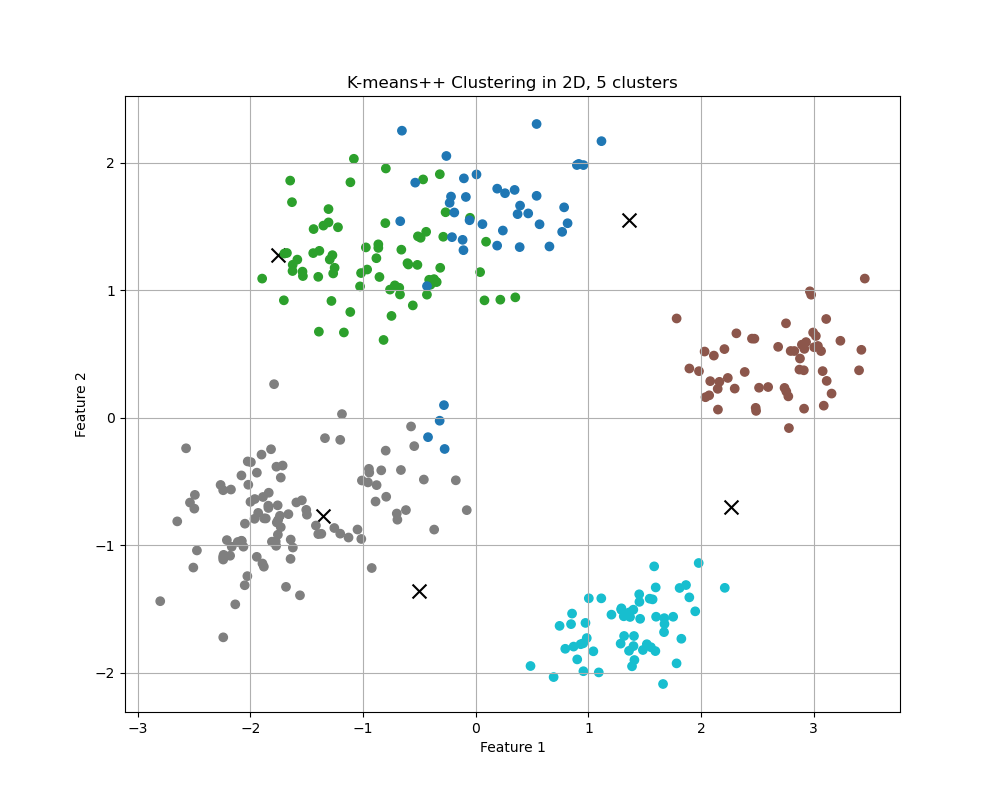

5


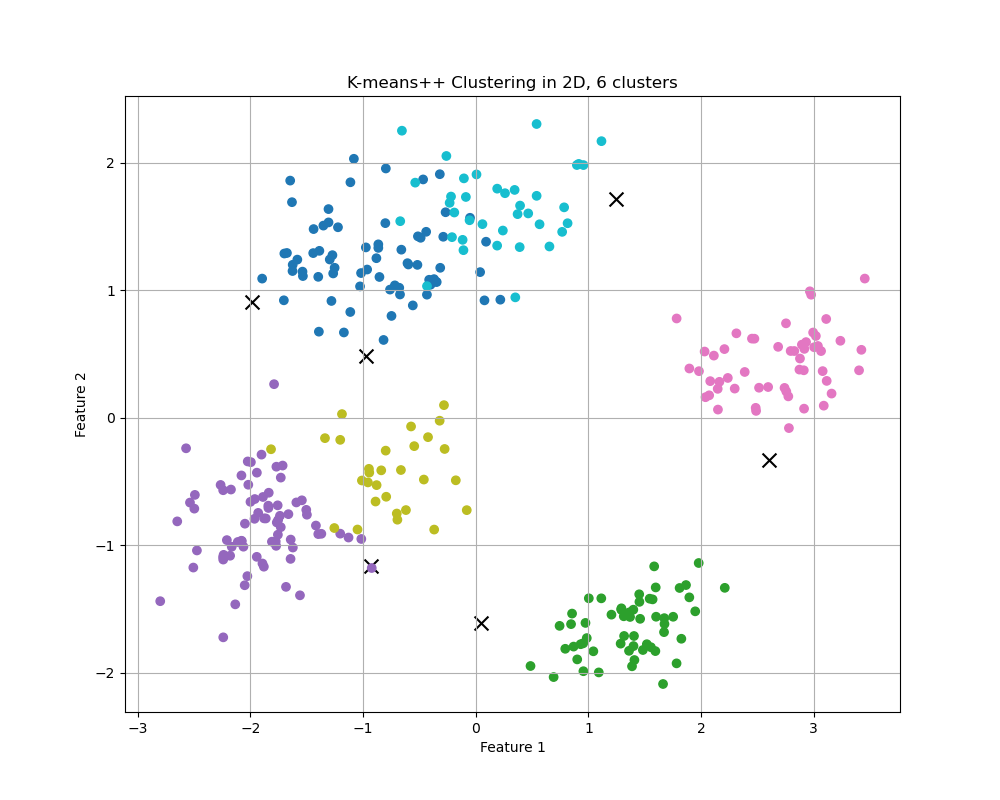

3


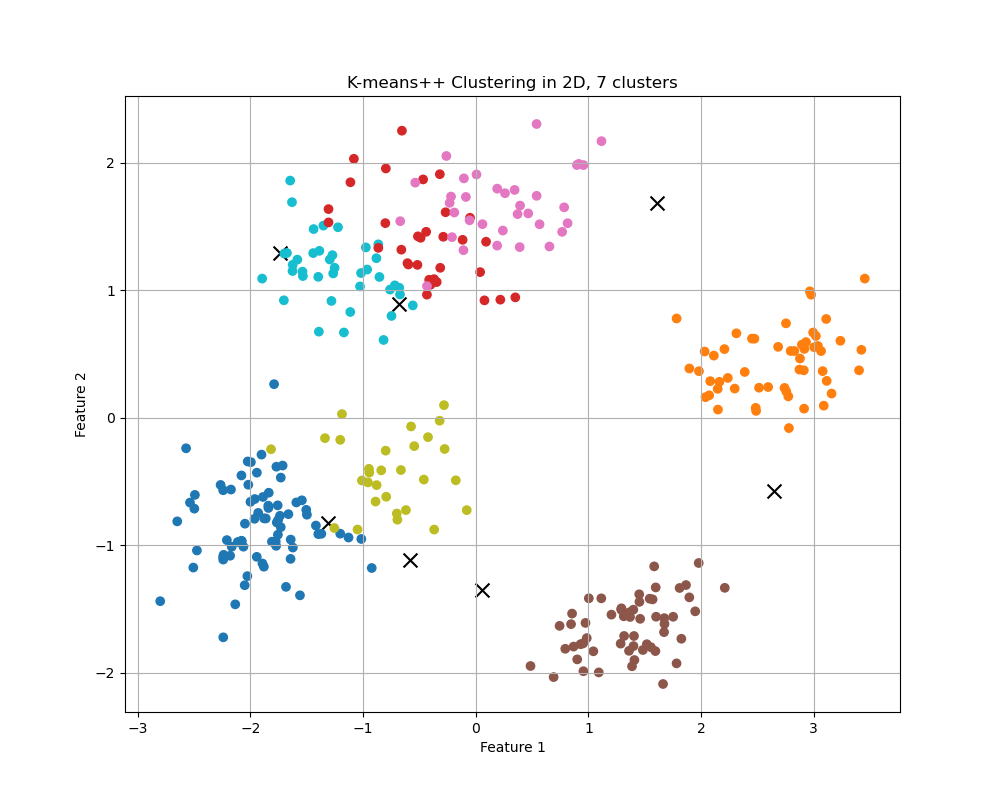

14


In [24]:
for k in range(4, 8):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    y_kmeans = kmeans.fit_predict(X)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.fit_transform(kmeans.cluster_centers_)

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker = 'x')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means++ Clustering in 2D, {k} clusters')
    plt.grid(True)
    plt.show()
    print(kmeans.n_iter_)

In [27]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.62679615,  1.15074471, -0.63284551],
       [-1.49914624, -0.76103791, -0.05178464],
       [-1.54374561, -0.64802894,  0.31856764],
       [-2.02432116, -0.34318778, -0.23480306],
       [-1.63165358,  1.69085902, -0.4730585 ],
       [-1.9618191 , -0.6380562 ,  0.00414638],
       [-0.51373398,  1.42292516, -1.09323177],
       [-2.00002368, -0.6600917 ,  0.53461795],
       [-1.64754224,  1.86013121, -0.61729129],
       [-1.93170015, -0.74682249, -0.42699494],
       [-1.71464123, -0.37538206,  0.04545202],
       [-0.46754033,  1.86926551, -0.41461815],
       [-2.53698767, -0.66574292, -0.54388951],
       [-0.65569121,  2.25158218,  0.36930745],
       [-1.89633007,  1.09131979, -0.77638235],
       [-1.9964409 , -0.34865671, -0.50775289],
       [-1.28140152,  0.91594895, -0.94735611],
       [-1.3929035 ,  0.67496817, -0.81269362],
       [-2.08027792, -0.45307186, -0.61157141],
       [-1.53832675,  1.14588457, -0.32101487],
       [-1.88915745, -0.62194064,  0.425

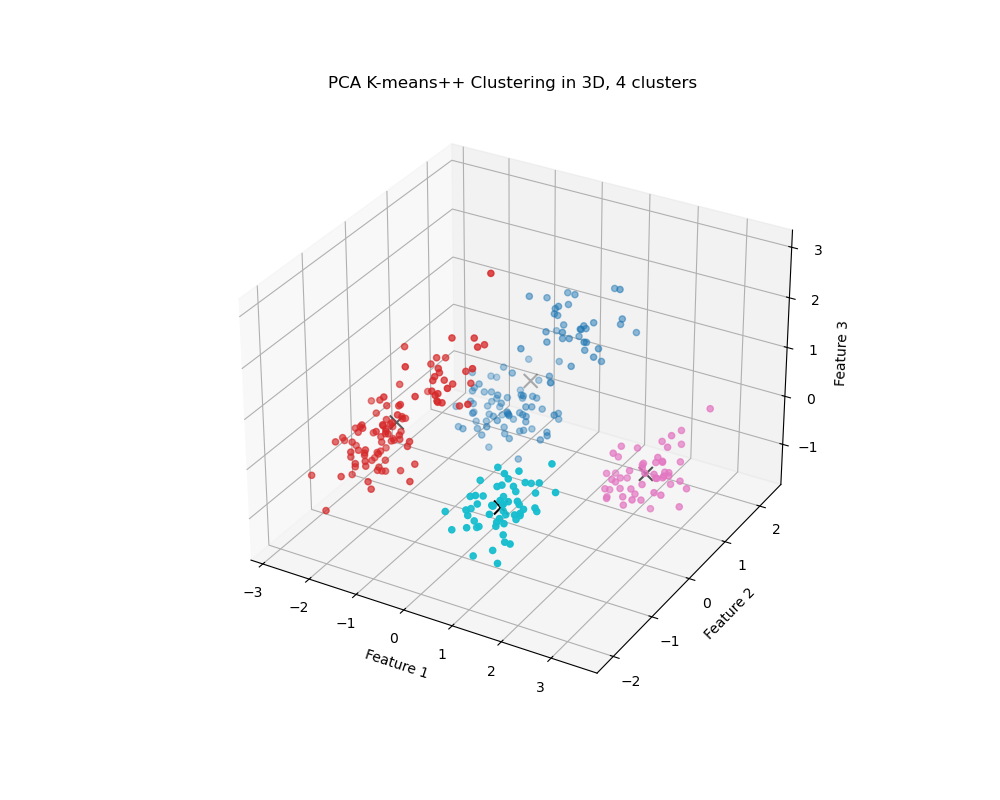

2


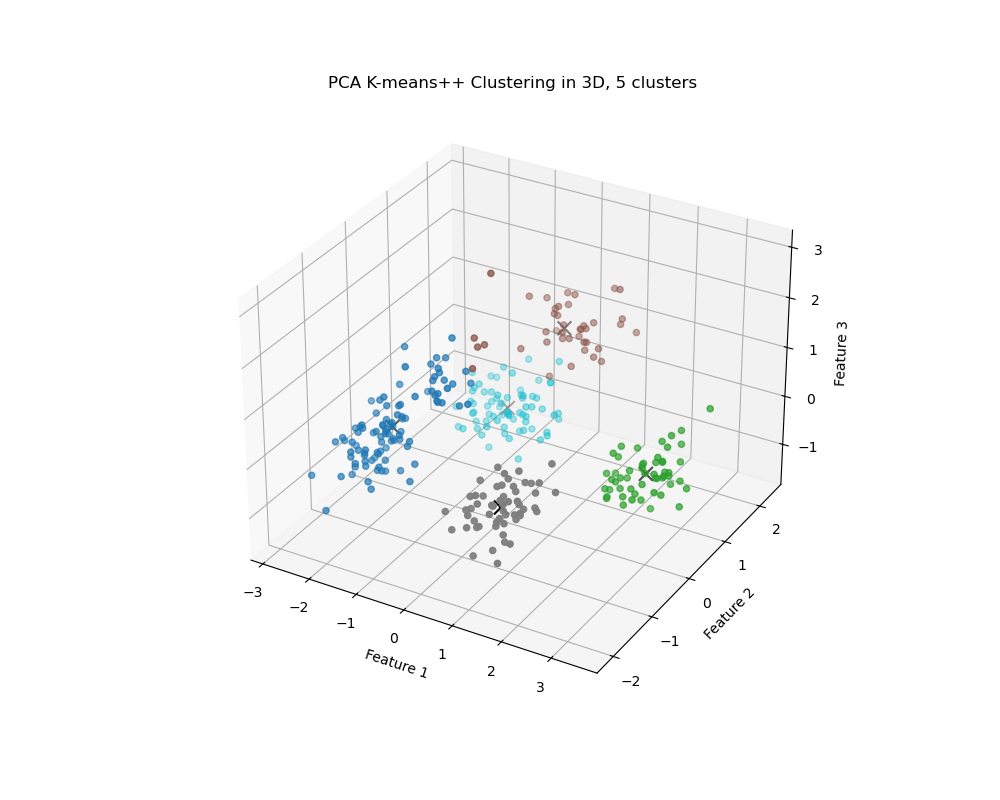

3


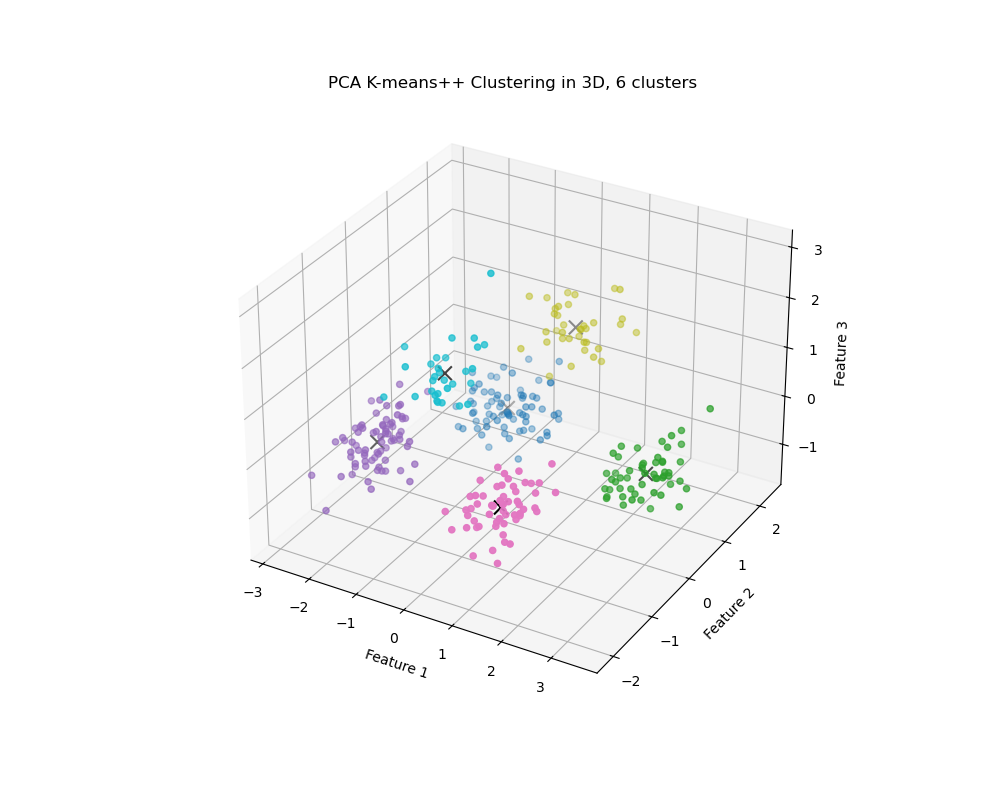

4


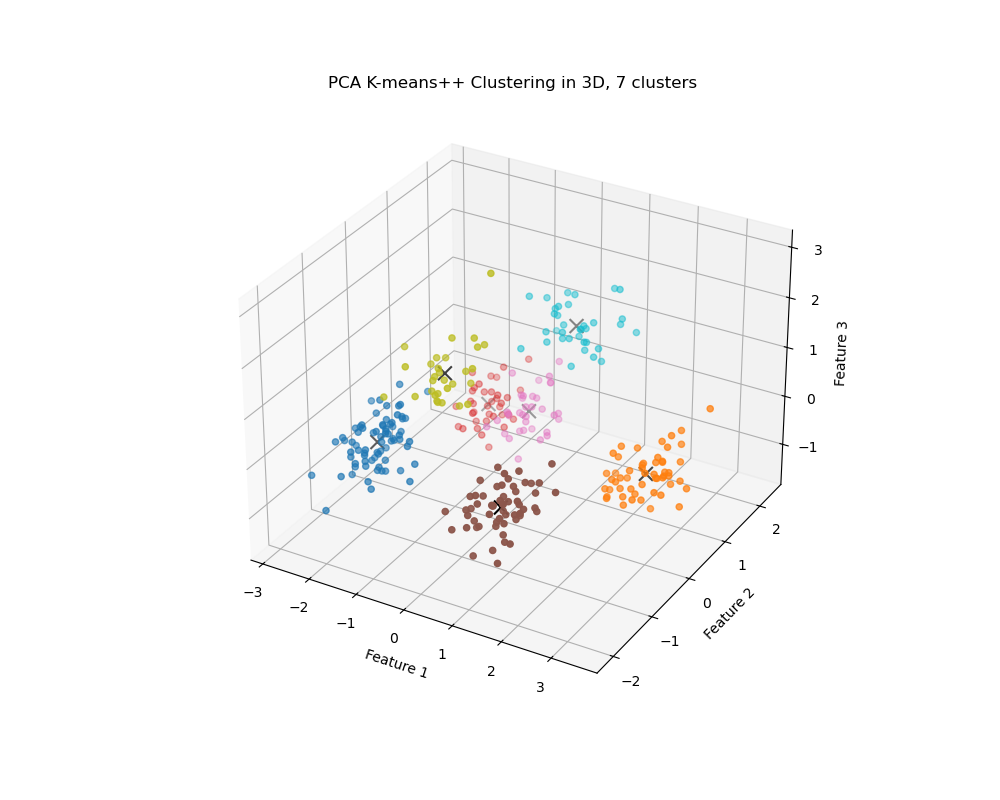

4


In [29]:
for k in range(4, 8):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    y_kmeans = kmeans.fit_predict(X_pca)
    labels = kmeans.labels_
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    p=ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='black', marker = 'x')
    p=ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(f'PCA K-means++ Clustering in 3D, {k} clusters')

    plt.show()
    print(kmeans.n_iter_)